<a href="https://colab.research.google.com/github/mohsenperfection/ML/blob/CHW04/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = 99102083'Your Student Number'
first_name = "Mohsen"'Your First Name'
last_name = "Kamalabadi Farahani"'Your Last Name'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import random
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [ ]:
# TODO: Write your code here

df = pd.read_csv('spotify.csv')
print(df.head())

print(df.columns)

relevant_columns = ['track_name', 'danceability', 'energy', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

df_relevant = df[relevant_columns]

print(df_relevant.head())


                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [ ]:
# TODO: Write your code here

df = pd.read_csv('spotify.csv')

relevant_columns = ['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

df_relevant = df[relevant_columns]

def standard_scaler(data):
    mean = data.mean()
    std = data.std()
    scaled_data = (data - mean) / std
    return scaled_data

df_scaled = df_relevant.apply(standard_scaler)

print(df_scaled.head())

df_final = pd.concat([df['track_name'], df_scaled], axis=1)
print(df_final.head())


   danceability    energy     tempo   valence  acousticness  instrumentalness  \
0      0.642039  1.201596  0.042926  0.031907     -0.333893         -0.377947   
1      0.490404  0.643307 -0.777186  0.782510     -0.468663         -0.359172   
2      0.138887  1.284510  0.116225  0.439377     -0.436792         -0.377843   
3      0.435264  1.278982  0.039953 -1.001780     -0.667632         -0.377905   
4     -0.033425  0.742804  0.115035  0.919763     -0.432694         -0.377947   

   liveness  speechiness  
0 -0.809217    -0.481355  
1  1.081044    -0.688631  
2 -0.519554    -0.324417  
3  0.089580    -0.050023  
4 -0.692574    -0.702450  
                                          track_name  danceability    energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...      0.642039  1.201596   
1                    Memories - Dillon Francis Remix      0.490404  0.643307   
2                    All the Time - Don Diablo Remix      0.138887  1.284510   
3                  Call You Min

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [ ]:
# TODO: Write your code here

pca = PCA()
pca.fit(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

threshold = 0.95
num_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

print(f'Number of components to retain to keep {threshold*100}% of variance: {num_components}')

pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_scaled)

print(df_pca[:5])


Number of components to retain to keep 95.0% of variance: 7
[[-0.66383317 -0.65611928 -0.80093004 -0.58723173 -0.41100151 -0.39609044
  -0.08468275]
 [-0.69295238 -0.8959125  -0.34008538  1.24130495 -0.81682023  0.43068284
  -0.25901069]
 [-0.97833338 -0.66326588 -0.48008625 -0.48863439 -0.5308327  -0.14997525
   0.30606054]
 [-1.14365468 -0.05451145 -0.14694461  0.1380018   0.05792101 -0.923898
  -0.49782999]
 [-0.64966776 -0.65355502 -0.67335894 -0.67809267 -0.90254868  0.19679658
   0.31395847]]


# Clustering

Implement K-means for clustering from scratch.

In [ ]:
# TODO: Write your code here

def initialize_centroids(data, k):
    """Randomly initialize centroids from the dataset"""
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the closest centroid"""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Calculate new centroids as the mean of the data points assigned to each cluster"""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100, tol=1e-4):
    """K-means clustering algorithm"""
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

data = df_scaled.to_numpy()

k = 5
labels, centroids = k_means(data, k)

print("Cluster labels for each data point:")
print(labels)

print("Centroids of each cluster:")
print(centroids)


Cluster labels for each data point:
[0 0 0 ... 4 4 1]
Centroids of each cluster:
[[ 0.53683861  0.14639925 -0.22545016  0.7291747  -0.1975014  -0.22283866
  -0.28252239 -0.33754842]
 [-0.35713975  0.49237468  0.04353235 -0.02448419 -0.31988129 -0.01980307
   2.46159078 -0.05003164]
 [-0.32002337 -1.4450536  -0.34940446 -0.53446737  1.75682247  0.14814362
  -0.2842562  -0.3499192 ]
 [ 0.48679412 -0.18326748  0.09168561  0.14675209  0.03007343 -0.31500777
  -0.09665007  1.9998013 ]
 [-0.66351868  0.47565101  0.40296759 -0.73210613 -0.53997837  0.3738223
  -0.17904162 -0.37553967]]


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

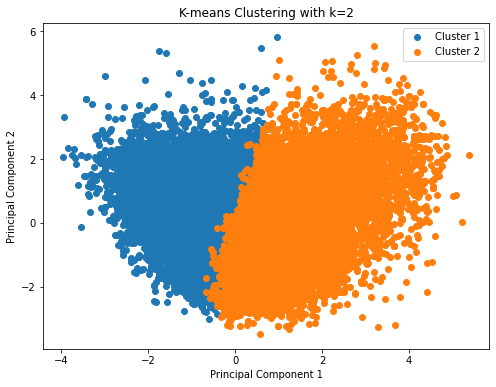

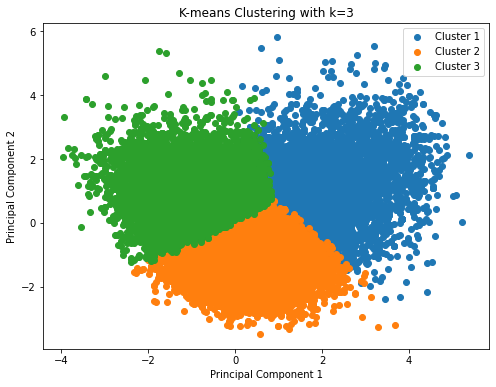

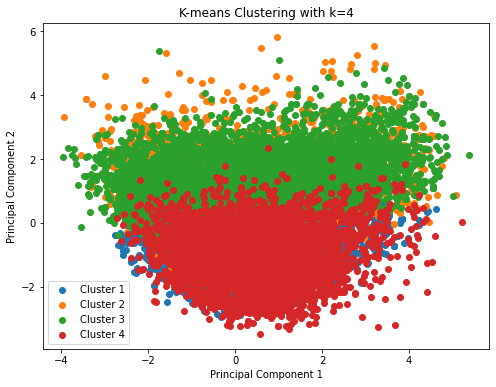

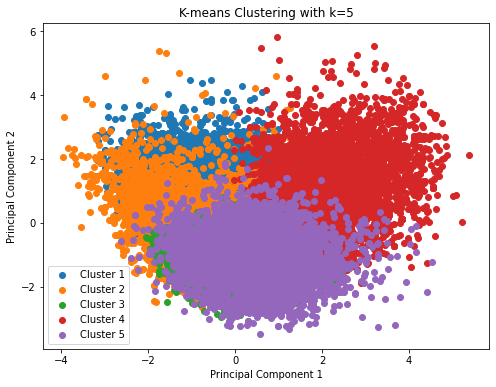

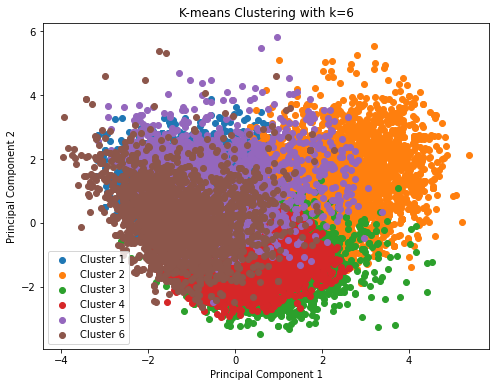

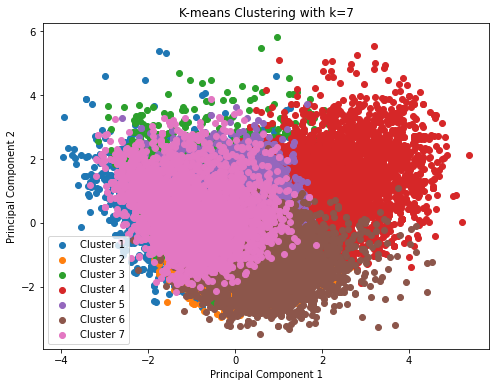

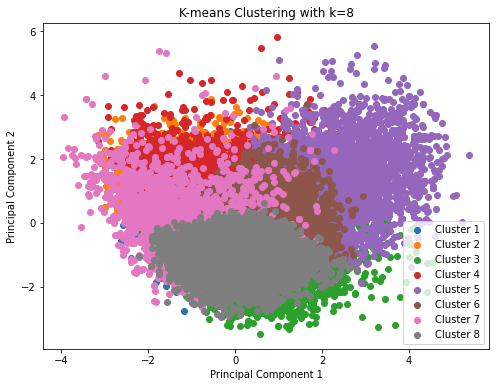

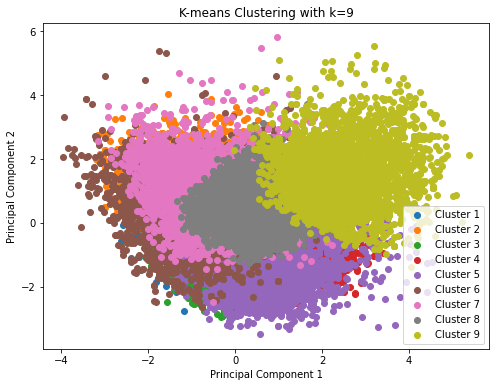

In [ ]:
# TODO: Write your code here


# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert dataframe to numpy array
data = df_scaled.to_numpy()

# Number of clusters ranging from 2 to 9
cluster_range = range(2, 10)

# Run K-means for each number of clusters and plot the results
for k in cluster_range:
    labels, centroids = k_means(data, k)

    # Plot the clusters using the first two principal components
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = df_pca[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    plt.title(f'K-means Clustering with k={k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

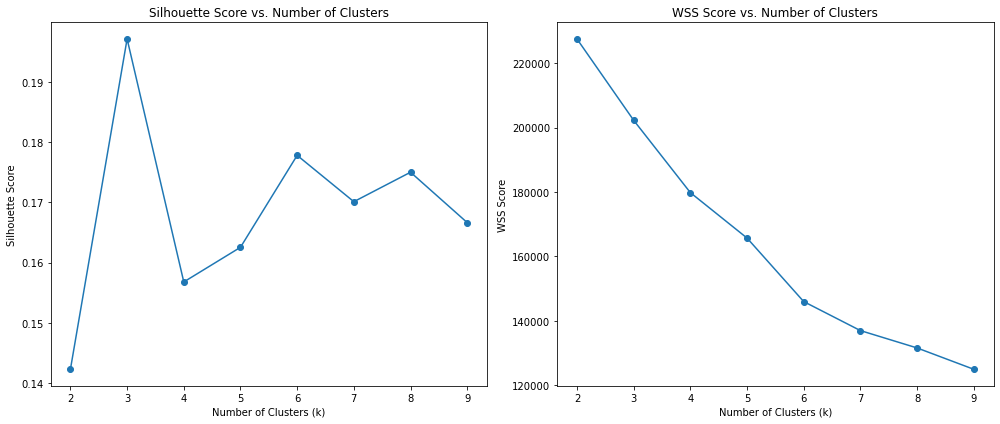

In [ ]:
# TODO: Write your code here


def compute_wss(data, labels, centroids):
    """Compute the Within-Cluster Sum of Squares (WSS)"""
    wss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss

data = df_scaled.to_numpy()

cluster_range = range(2, 10)

silhouette_scores = []
wss_scores = []

for k in cluster_range:
    labels, centroids = k_means(data, k)
    silhouette_scores.append(silhouette_score(data, labels))
    wss_scores.append(compute_wss(data, labels, centroids))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, wss_scores, marker='o')
plt.title('WSS Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WSS Score')

plt.tight_layout()
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

/var/folders/65/bf82v36x7pb1bp3trrt6lssr0000gn/T/ipykernel_14728/4217906172.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['cluster'] = labels


Cluster 0:
               track_name  danceability  energy    tempo  valence  \
20284  Otro Trago - Remix         0.725   0.790  175.988    0.763   
17367               Carta         0.704   0.573   95.957    0.890   

       acousticness  instrumentalness  liveness  speechiness  
20284        0.0711          0.000001    0.0602       0.1970  
17367        0.3800          0.000002    0.0963       0.0319  
Cluster 1:
                                        track_name  danceability  energy  \
12898  I Want to Know What Love Is - 1999 Remaster         0.477   0.471   
22022                                    Un Veneno         0.670   0.318   

        tempo  valence  acousticness  instrumentalness  liveness  speechiness  
12898  81.204    0.423         0.193          0.000002     0.131       0.0277  
22022  85.806    0.304         0.859          0.001980     0.106       0.2980  
Cluster 2:
                track_name  danceability  energy    tempo  valence  \
11693  A Life Within a Day     

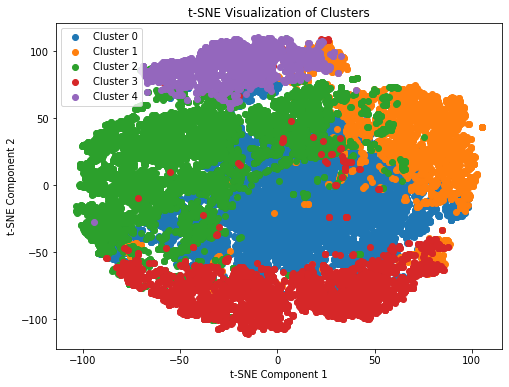

In [ ]:
# TODO: Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

# Load the data
df = pd.read_csv('spotify.csv')

relevant_columns = ['track_name', 'danceability', 'energy', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

df_relevant = df[relevant_columns]

def standard_scaler(data):
    mean = data.mean()
    std = data.std()
    scaled_data = (data - mean) / std
    return scaled_data

df_scaled = df_relevant.iloc[:, 1:].apply(standard_scaler)

def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

data = df_scaled.to_numpy()

k = 5
labels, centroids = k_means(data, k)

df_relevant['cluster'] = labels

for cluster in range(k):
    cluster_songs = df_relevant[df_relevant['cluster'] == cluster]
    sample_songs = cluster_songs.sample(n=2)
    print(f"Cluster {cluster}:")
    print(sample_songs[['track_name'] + relevant_columns[1:]])

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = data_tsne[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

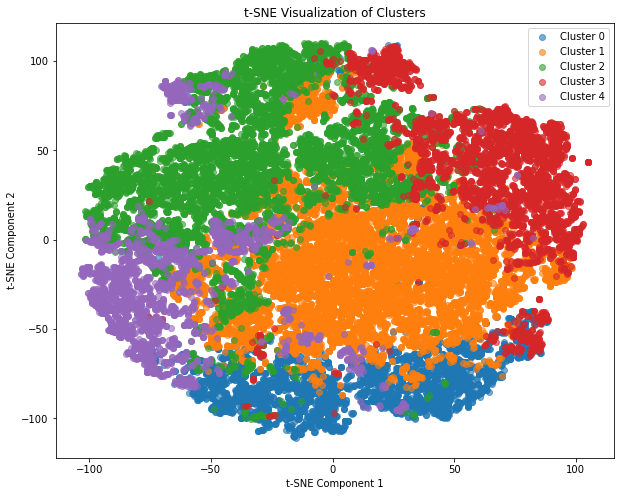

In [ ]:
# TODO: Write your code here

data = df_scaled.to_numpy()

k = 5
labels, centroids = k_means(data, k)

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_points = data_tsne[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
